In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train = pd.read_csv("~/data/kaggle/GiveMeSomeCredit/WoeData.csv")
test = pd.read_csv("~/data/kaggle/GiveMeSomeCredit/TestWoeData.csv",)

In [5]:
X=train.drop(['SeriousDlqin2yrs', 'DebtRatio','MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
y = train.iloc[:, -1]

In [6]:
test=test.drop(['SeriousDlqin2yrs', 'DebtRatio','MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [112]:
model = LogisticRegressionCV(random_state=0, cv=15)
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=15, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [113]:
pred = model.predict_proba(X_test)[:, 1]

In [114]:
fpr, tpr, threshold = roc_curve(y_test, pred)
rocauc = auc(fpr, tpr)
rocauc

0.8529791610016413

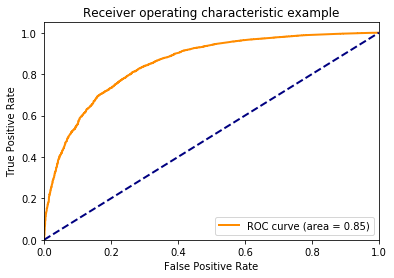

In [115]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [120]:
pred_test = model.predict_proba(test)[:, 1]

In [121]:
orig = pd.read_csv("~/data/kaggle/GiveMeSomeCredit/cs-test.csv")


In [122]:
submission = pd.DataFrame({"Id": orig.loc[:, 'Unnamed: 0'].values})
submission["Probability"] = pred_test
submission.to_csv("submission1.csv", index=False)

In [2]:
import lightgbm as lgb
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [8]:
lgb_sk = lgb.LGBMClassifier(random_state=0).fit(X_train, y_train)

In [9]:
preddd = lgb_sk.predict_proba(X_test)[:, 1]

In [10]:
fpr, tpr, threshold = roc_curve(y_test, preddd)
rocauc = auc(fpr, tpr)
rocauc

0.8505561011735641

In [11]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_test = lgb.Dataset(X_test,y_test,reference=lgb_train)
lgb_origi_params = {'boosting_type':'gbdt',
              'max_depth':-1,
              'num_leaves':31,
              'bagging_fraction':1.0,
              'feature_fraction':1.0,
              'learning_rate':0.1,
              'metric': 'auc'}
lgb_origi = lgb.train(train_set=lgb_train,
                      early_stopping_rounds=10,
                      num_boost_round=400,
                      params=lgb_origi_params,
                      valid_sets=lgb_test)

[1]	valid_0's auc: 0.846217
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.846151
[3]	valid_0's auc: 0.846883
[4]	valid_0's auc: 0.846899
[5]	valid_0's auc: 0.846971
[6]	valid_0's auc: 0.851054
[7]	valid_0's auc: 0.851012
[8]	valid_0's auc: 0.85102
[9]	valid_0's auc: 0.851037
[10]	valid_0's auc: 0.851046
[11]	valid_0's auc: 0.851023
[12]	valid_0's auc: 0.851464
[13]	valid_0's auc: 0.851485
[14]	valid_0's auc: 0.851642
[15]	valid_0's auc: 0.851613
[16]	valid_0's auc: 0.851857
[17]	valid_0's auc: 0.851828
[18]	valid_0's auc: 0.852048
[19]	valid_0's auc: 0.852035
[20]	valid_0's auc: 0.852034
[21]	valid_0's auc: 0.852003
[22]	valid_0's auc: 0.852053
[23]	valid_0's auc: 0.852075
[24]	valid_0's auc: 0.852153
[25]	valid_0's auc: 0.852185
[26]	valid_0's auc: 0.852181
[27]	valid_0's auc: 0.852209
[28]	valid_0's auc: 0.852122
[29]	valid_0's auc: 0.852157
[30]	valid_0's auc: 0.852109
[31]	valid_0's auc: 0.852086
[32]	valid_0's auc: 0.852036
[33]	valid_0's auc: 